<a href="https://colab.research.google.com/github/prabhhav/JupyterNotebooks/blob/main/Fashion_MNIST_NN_Prabhhav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)


2.4.0


In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
#metadata
#dataset

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteKAXO0N/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteKAXO0N/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
dataset

{'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [ ]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255 # normalize operation
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

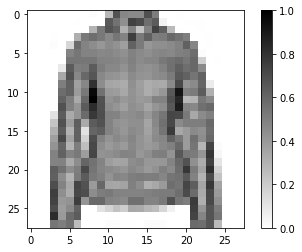

In [ ]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## Model Building

In [ ]:
print(28*28) #ip
print(784*128 + 128) # w_l0_l1 and bias tunable values
print(128*10+10) # w_l1_l2

784
100480
1290


In [ ]:
100480 +1290

101770

In [ ]:
## Define your model here

l1 = tf.keras.layers.Flatten(input_shape=(28,28,1))
l2 = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)
l3 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
model = tf.keras.Sequential([l1,l2,l3])

In [ ]:
# # Another way


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
model.fit(train_dataset, epochs=20, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/20
1875/1875 [==============================] - 11s 3ms/step - loss: 0.6298 - accuracy: 0.7840
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3878 - accuracy: 0.8610
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3439 - accuracy: 0.8730
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3151 - accuracy: 0.8849
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2908 - accuracy: 0.8933
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2824 - accuracy: 0.8967
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2715 - accuracy: 0.8994
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2599 - accuracy: 0.9032
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2454 - accuracy: 0.9074
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.3631 - accuracy: 0.8834
Accuracy on test dataset: 0.883400022983551


In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [ ]:
predictions.shape
predictions[0]

array([4.7279919e-08, 1.1343911e-12, 2.7927698e-03, 1.5742158e-09,
       9.7231776e-01, 4.2337667e-15, 2.4889454e-02, 1.2473359e-11,
       9.3582008e-12, 7.5288865e-11], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels[0]

4

In [ ]:
class_names[np.argmax(predictions[0])]

'Coat'

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

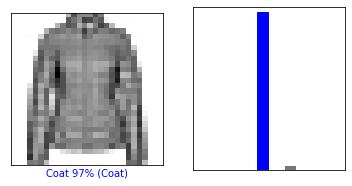

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

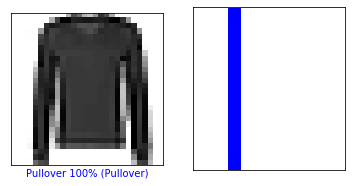

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

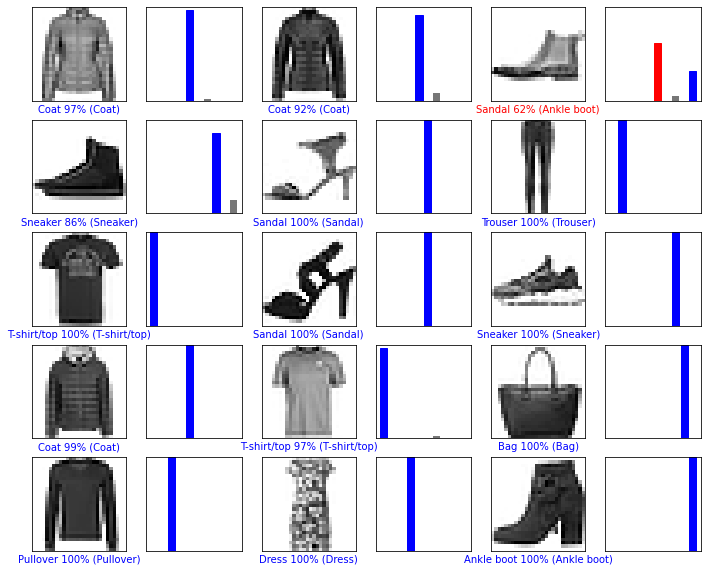

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# color correct predictions in blue, incorrect predictions in red

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions,test_labels,test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [ ]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [ ]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.7280007e-08 1.1343911e-12 2.7927726e-03 1.5742218e-09 9.7231776e-01
  4.2337667e-15 2.4889490e-02 1.2473359e-11 9.3582364e-12 7.5288865e-11]]


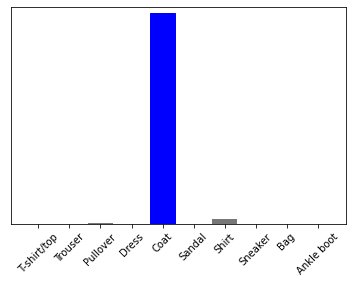

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

4